# OK Cupid ML Analysis Project

## Introduction
Internet dating has existed in some form for over two decades, and it has only gotten more popular since its conception. These websites utilize data gathering and machine learning models to predict who could be a perfect fit for love. 

The goal of this project will be to analyze dating profiles and see if we can understand any connections between labels. Specifically we will being to test if essays can accurately predict other profile features. 

## Data
The data provided from OK Cupid is contained in one dataframe: 
```python
"profiles.csv"
Rows:            59946
Columns:         31
Duplicate Rows:  0
Null Values:     273202
Column Names:    ['age', 'body_type', 'diet', 'drinks', 'drugs', 'education',\
                  'essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5',\
                  'essay6', 'essay7', 'essay8', 'essay9', 'ethnicity', 'height',\
                  'income', 'job', 'last_online', 'location', 'offspring', \
                  'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes', \
                  'speaks', 'status']
    
Majority of columns are object, with the excpetion of age/height/income which are int/float/int
```

This data as pulled from almost 60,000 people living in the San Francisco Bay Area around the summer of 2012. The people observed have a mean age of 32, and are majority straight, white, non cigarette smokers, and never use drugs. There are less biased distributions among some of the other categories such as body type, job, astrological sign, and gender. Some categories have at least a third of recorded answers as null, or the users preferred not to answer such as in the columns diet, offspring, pets, religion, and income. 

There are also 10 essays where users could answer more complicated question in a longer format. This will be the information that we train our data on, in hopes of predicting one of the other columns. The 10 essays are:
```
essay0 - My self summary
essay1 - What I’m doing with my life
essay2 - I’m really good at
essay3 - The first thing people usually notice about me
essay4 - Favorite books, movies, show, music, and food
essay5 - The six things I could never do without
essay6 - I spend a lot of time thinking about
essay7 - On a typical Friday night I am
essay8 - The most private thing I am willing to admit
essay9 - You should message me if…
```

## Scope
The goal of this project is to develop a machine learning model to understand if any features can be predicted based on the written essays created by users.

There are two sets of figures which will visualize the goal of this project:
- Figure 1.1: This figure shows the 10 essays being tested on each label available in the data, using a Naives Bayes Classifier.
- Figure 2.1: Drugs label and Essay0 data represented on a confusion matrix with accuracy, recall, precision, and f1 scores.
- Figure 2.2: Income label and Essay0 data represented on a confusion matrix accuracy, recall, precision, and f1 scores.
- Figure 2.3: Orientation label and Essay0 data represented on a confusion matrix accuracy, recall, precision, and f1 scores.
- Figure 2.4: Sex label and Essay0 data represented on a confusion matrix accuracy, recall, precision, and f1 scores.
- Figure 2.5: Smokes label and Essay0 data represented on a confusion matrix accuracy, recall, precision, and f1 scores.

Looking at Figure 1.1:
- There is extremely low amount of variation between the accuracy scores of how each label is trained on the 10 differrent essays.
- The labels drugs, income, orientation, sex, and smokes all show high capabilities to be able to accurately predict.
- The labels body type, job, offspring, pets, and religion all show low capabilities to be able to accurately predict.

Looking at Figures 2.1 - 2.5:
- The labels for drugs, income, orientation, and smokes all can accurately predict only one feature of the label.
- The label of sex is able to be accurately predicted between the two features.


## Conclusion
The majority of the labels were unable to be predicted based on the various essays written by users, with the exception of the Sex label.
   - All of the labels that had somewhat even distribution between the label features were unable to be accurately predicted. 
   - All of the labels that could be accurately predicted had a dominantly biased feature, further explaination on this can be found on Appendix A.1.
   - An exception can be made fo the sex label, which had even distribution between label features, and 70% accurate predictions of label features.




## Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
### importing main dataframe
df = pd.read_csv("profiles.csv")
### quick edit for replacing the code for an apostrophe from &rsquo; to '
df = df.replace('&rsquo;','\'', regex=True)

In [4]:
print("GENERAL INFORMATION ON THE DATAFRAME:\n")

print("Rows: ", len(df))
print("Columns: ", len(df.columns))
print("Duplicate Rows: ", df.duplicated().sum())
print("Rows with Null:\n", df.isnull().sum().reset_index())

print("\n")

print("Column Names:\n", list(df.columns))

print("\n")

print("age:\n", "Number of Unique: ", df.age.nunique(), "\n Minimum: ", df.age.min(), "\n Maximum:", df.age.max(), "\n Mean:", df.age.mean() )
print("\n")
print("height:\n", "Number of Unique: ", df.height.nunique(), "\n Minimum: ", df.height.min(), "\n Maximum:", df.height.max(), "\n Mean:", df.height.mean() )
print("\n")
EDA_list1 = ["body_type", "diet", "drugs", "education", "ethnicity", "income", "job", "last_online", "location", "offspring", "orientation",\
             "pets", "religion", "sex", "sign", "smokes", "speaks", "status"]
for list_i in EDA_list1:
    top_10_counter = df[list_i].value_counts(dropna=False).reset_index()
    top_10_counter = top_10_counter.sort_values(by=list_i, ascending=False)
    top_10_counter.columns = [list_i, "count"]
    print("{}:\n".format(list_i), "Number of Unique: ", df[list_i].nunique(), "\n Top 10 Unique Labels:\n",\
        top_10_counter[0:10]) 
    print("\n")
    
print("Data Types Info:\n", df.dtypes)

print("\n")


GENERAL INFORMATION ON THE DATAFRAME:

Rows:  59946
Columns:  31
Duplicate Rows:  0
Rows with Null:
           index      0
0           age      0
1     body_type   5296
2          diet  24395
3        drinks   2985
4         drugs  14080
5     education   6628
6        essay0   5488
7        essay1   7572
8        essay2   9638
9        essay3  11476
10       essay4  10537
11       essay5  10850
12       essay6  13771
13       essay7  12451
14       essay8  19225
15       essay9  12603
16    ethnicity   5680
17       height      3
18       income      0
19          job   8198
20  last_online      0
21     location      0
22    offspring  35561
23  orientation      0
24         pets  19921
25     religion  20226
26          sex      0
27         sign  11056
28       smokes   5512
29       speaks     50
30       status      0


Column Names:
 ['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essa

In [5]:
### Some adjustments to the data....
### adding a column that shows only the sign, and only the religion.
df["only_sign"] = df["sign"].str.split(" ").str[0]
df["only_religion"] = df["religion"].str.split(" ").str[0]

## Modeling
First, we will be using a Naives Bayes Classifier to understand if we can guess the labels based on the 10 essays that were written by the users. Figure 1.1 displays these results. 

Then we will take the most predictable results from Figure 1.1 and further evaluate the model to understand it better. You will see in Figures 2.1-2.5 that most of the data is biased, which is further explained in Appendix A.1.

In [6]:
def Naive_Bayes_Classifier(label, train_data):
    #create a df that creates a list of labels to predict based on the data we want to train.
    sorted_df = df.sort_values(by=label)
    sorted_df = sorted_df.dropna(subset=[label, train_data])
    make_labels_uniques = list(sorted_df[label].unique())
    index_list = []
    essay_list = []
    
    #form a list of indexes to test on as train/test labels
    for label_i in range(len(make_labels_uniques)):
        indexes = [label_i] * len(sorted_df[sorted_df[label] == make_labels_uniques[label_i]])
        index_list.append(indexes)
    index_list = [item for sublist in index_list for item in sublist]
    
    #form a list of all the information from the data to be trained on
    for row in sorted_df[train_data]:
        essay_list.append(row)
        
    
    #split the train/test information
    train_labels, test_labels, train_data, test_data = train_test_split(index_list, essay_list,\
                                                                        test_size=0.2, random_state=1)
    #train the model on our voabularly by creating count vectors, and then count our two sets of train/test data
    counter = CountVectorizer()
    counter.fit(train_data)
    train_counts = counter.transform(train_data)
    test_counts = counter.transform(test_data)
    
    #train the classifier to classify the data based on the label we are trying to predict
    classifier = MultinomialNB()
    classifier.fit(train_counts, train_labels)
    
    #prediction accuracy
    predictions = classifier.predict(test_counts)
    prediction_accuracy = accuracy_score(test_labels, predictions)
    prediction_matrix = confusion_matrix(test_labels, predictions)
    
    return prediction_accuracy


In [7]:
#create a list of prediction labels to later learn which provides the highest accuracy score
def which_label_is_best(list_of_labels, train_data_list):
    prediction_scores_df = pd.DataFrame()
    for data_item in train_data_list:
        prediction_scores = []
        for label_in_list in list_of_labels: 
            prediction_scores.append(Naive_Bayes_Classifier(label_in_list, data_item))
        prediction_scores_df[data_item] = prediction_scores
    return prediction_scores_df

In [8]:
labels_to_test = ["body_type", "diet", "drugs", "income", "job", "offspring", "orientation", "pets",\
                  "sex", "smokes", "sign", "only_sign", "religion", "only_religion"]
data_to_train = ["essay0", "essay1", "essay2", "essay3", "essay4", "essay5", "essay6", "essay7", "essay8", "essay9"]
full_score_df = which_label_is_best(labels_to_test, data_to_train)
full_score_df

,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,0.302141,0.290484,0.288983,0.276935,0.290937,0.299255,0.267336,0.277950,0.257448,0.278789
1,0.461610,0.457558,0.459199,0.460363,0.454002,0.459432,0.464545,0.454592,0.448064,0.457754
2,0.803541,0.793715,0.795836,0.803128,0.800884,0.808058,0.797939,0.798978,0.796723,0.796960
3,0.793243,0.795895,0.796859,0.797504,0.803987,0.801222,0.800433,0.794505,0.789073,0.796599
4,0.202358,0.296638,0.164805,0.145724,0.182974,0.165629,0.170046,0.169630,0.144588,0.149647
5,0.321977,0.319897,0.287754,0.283861,0.310848,0.338112,0.298739,0.310662,0.271525,0.299025
6,0.838597,0.842482,0.837706,0.840004,0.848006,0.840224,0.836600,0.835667,0.843585,0.844545
7,0.340405,0.370072,0.363780,0.356098,0.356853,0.368038,0.362125,0.353321,0.366404,0.349720
8,0.709328,0.673508,0.670443,0.668867,0.667881,0.686558,0.624147,0.629014,0.601105,0.636920
9,0.800704,0.801252,0.797397,0.802108,0.799956,0.802703,0.801437,0.790395,0.809854,0.799125


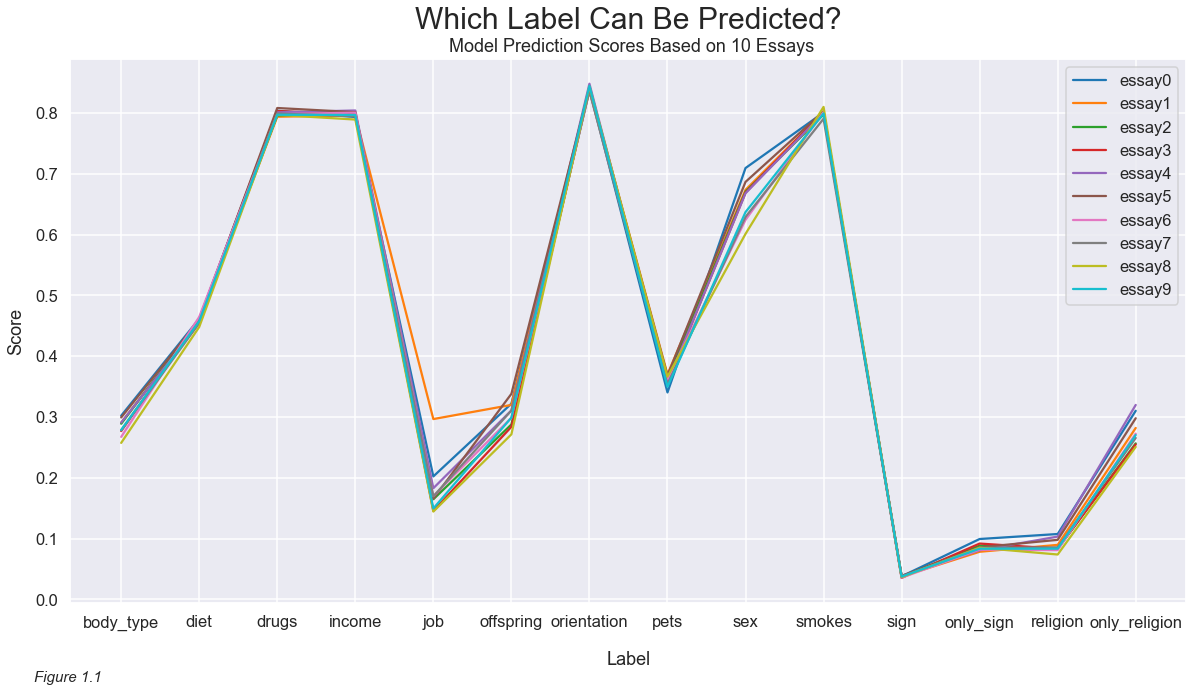

In [139]:
import seaborn as sns

sns.set_context("talk")
sns.set_style("darkgrid")

fig, axes = plt.subplots(figsize=(20, 10))
for col in full_score_df.columns:
    plt.plot(range(len(labels_to_test)), full_score_df[col])
axes.set_xticks(range(len(labels_to_test)))
axes.set_xticklabels(labels_to_test)
plt.xlabel("Label", labelpad=20)
plt.ylabel("Score", labelpad=10)

plt.title("Which Label Can Be Predicted?", fontsize=30, pad=30)
plt.text(x=4.2, y=.9, s="Model Prediction Scores Based on 10 Essays")
plt.figtext(0.1, 0.015, "Figure 1.1", fontsize=15, fontstyle="italic")
plt.legend(full_score_df.columns)

plt.savefig("Fig1-1_LabelPredictionAccuracy")
plt.show()

In [168]:
def NBC_Score_Plot(label, train_data, fignum):
    #create a df that creates a list of labels to predict based on the data we want to train.
    sorted_df = df.sort_values(by=label)
    sorted_df = sorted_df.dropna(subset=[label, train_data])
    make_labels_uniques = list(sorted_df[label].unique())
    index_list = []
    essay_list = []
    
    #form a list of indexes to test on as train/test labels
    for label_i in range(len(make_labels_uniques)):
        indexes = [label_i] * len(sorted_df[sorted_df[label] == make_labels_uniques[label_i]])
        index_list.append(indexes)
    index_list = [item for sublist in index_list for item in sublist]
    
    #form a list of all the information from the data to be trained on
    for row in sorted_df[train_data]:
        essay_list.append(row)
        
    
    #split the train/test information
    train_labels, test_labels, train_data, test_data = train_test_split(index_list, essay_list,\
                                                                        test_size=0.2, random_state=1)
    #train the model on our voabularly by creating count vectors, and then count our two sets of train/test data
    counter = CountVectorizer()
    counter.fit(train_data)
    train_counts = counter.transform(train_data)
    test_counts = counter.transform(test_data)
    
    #train the classifier to classify the data based on the label we are trying to predict
    classifier = MultinomialNB()
    classifier.fit(train_counts, train_labels)
    
    #prediction accuracy score, recall score, precision score, f1 score, and confusion matrix

    predictions = classifier.predict(test_counts)
    prediction_accuracy = accuracy_score(test_labels, predictions)
    prediction_recall = recall_score(test_labels, predictions, average="weighted", zero_division=0)
    prediction_precision = precision_score(test_labels, predictions, average="weighted", zero_division=0)
    prediction_f1 = f1_score(test_labels, predictions, average="weighted", zero_division=0)
    prediction_matrix = confusion_matrix(test_labels, predictions)
    
    sns.set_context("talk")
    sns.set_style("ticks")
    fig, ax = plt.subplots(figsize=(15,10))

    ticks=np.linspace(0, (prediction_matrix.shape[0] - 1),num= prediction_matrix.shape[0])
    plt.imshow(prediction_matrix, interpolation='none', cmap= plt.cm.RdPu)
    plt.xticks(ticks, fontsize=15)
    plt.yticks(ticks, fontsize=15)
    ax.set_xticklabels(make_labels_uniques, rotation=30)
    ax.set_yticklabels(make_labels_uniques)    
    
    for i in range(prediction_matrix.shape[0]):
        for j in range(prediction_matrix.shape[1]):
            if prediction_matrix.shape[0] > 5:
                plt.text(x=i, y=j, s="{:,}".format(prediction_matrix[i,j]), ha="center", va="center", fontsize=10,\
                     color="white" if prediction_matrix[i, j] > (prediction_matrix.max()/2) else "black")
            elif prediction_matrix.shape[0] < 5:
                plt.text(x=i, y=j, s="{:,}".format(prediction_matrix[i,j]), ha="center", va="center", fontsize=40,\
                     color="white" if prediction_matrix[i, j] > (prediction_matrix.max()/2) else "black")
            else:
                plt.text(x=i, y=j, s="{:,}".format(prediction_matrix[i,j]), ha="center", va="center",\
                     color="white" if prediction_matrix[i, j] > (prediction_matrix.max()/2) else "black")
    
    
    plt.xlabel('Predicted', fontsize=20, labelpad=15)
    plt.ylabel('Actuals', fontsize=20, labelpad=25)
    plt.title('{} Confusion Matrix'.format(label.title()), fontsize=25)
    
    #plt.colorbar()
    plt.figtext(0.01, 0.015, "Figure 2.{}".format(fignum), fontsize=15, fontstyle="italic")
    plt.figtext(.8, .65, s="Accuracy: {:.4f}".format(prediction_accuracy))
    plt.figtext(.8, .55, s="Recall: {:.4f}".format(prediction_recall))
    plt.figtext(.8, .45, s="Precision: {:.4f}".format(prediction_precision))
    plt.figtext(.8, .35, s="F1 Score: {:.4f}".format(prediction_f1))

    fig.tight_layout()
    plt.savefig("Fig2-{fignum}_{label}CM".format(fignum=fignum, label=label.title()))
    
    plt.show()
    plt.clf()


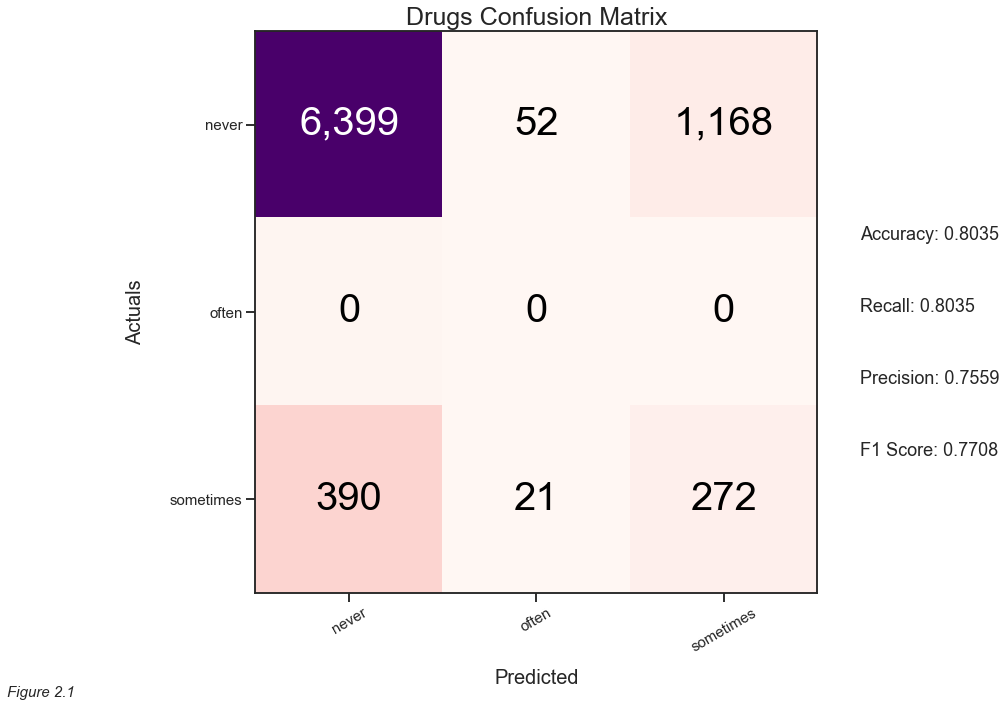

<Figure size 432x288 with 0 Axes>

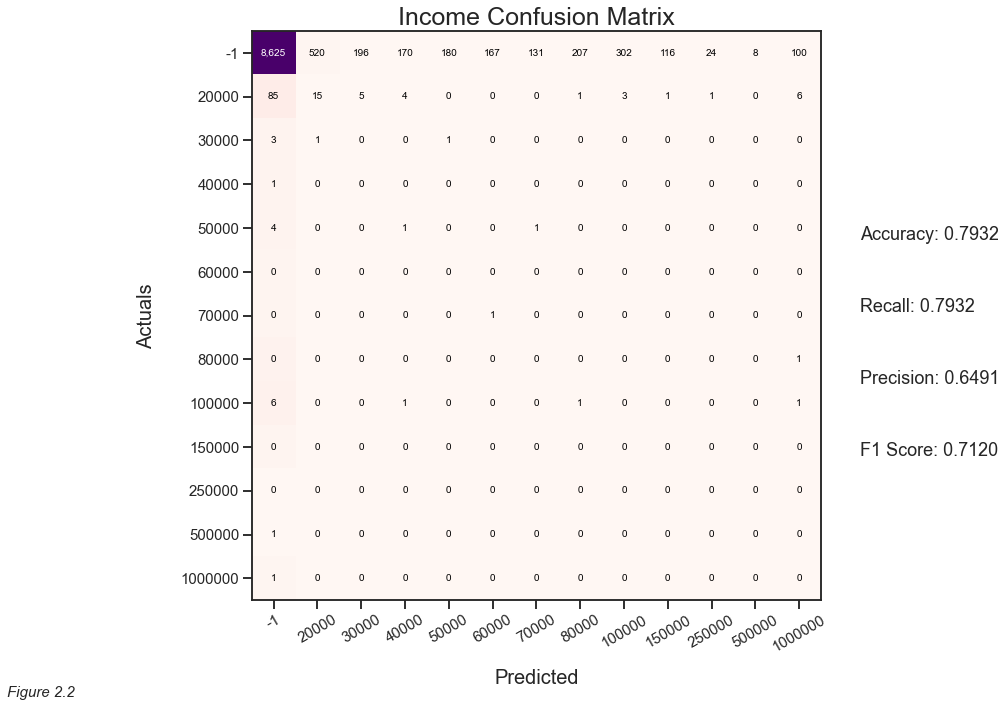

<Figure size 432x288 with 0 Axes>

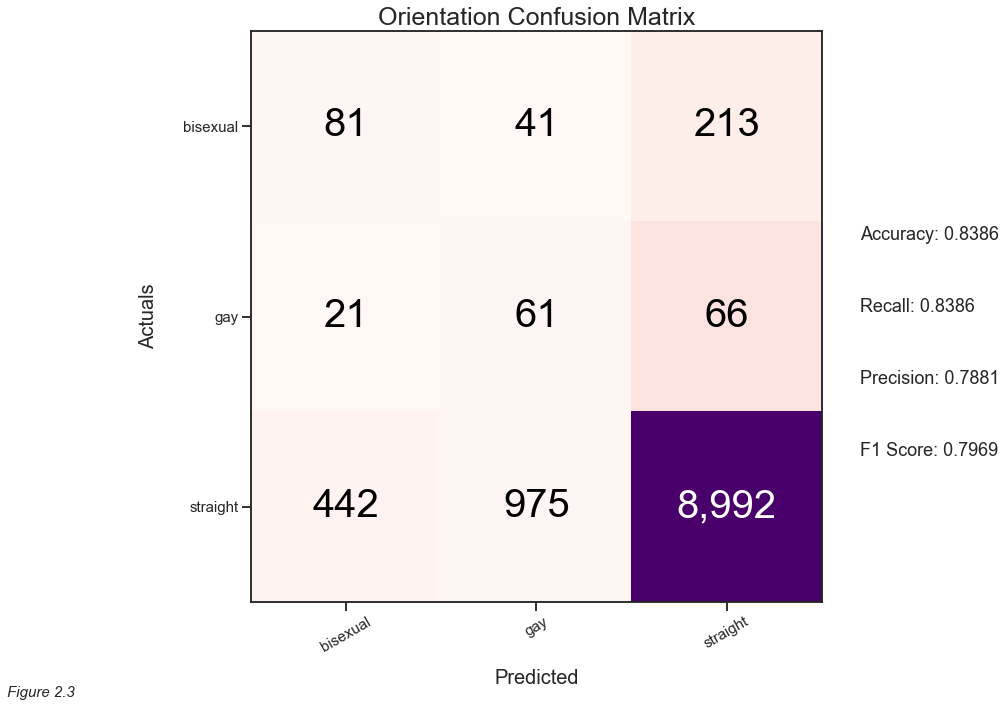

<Figure size 432x288 with 0 Axes>

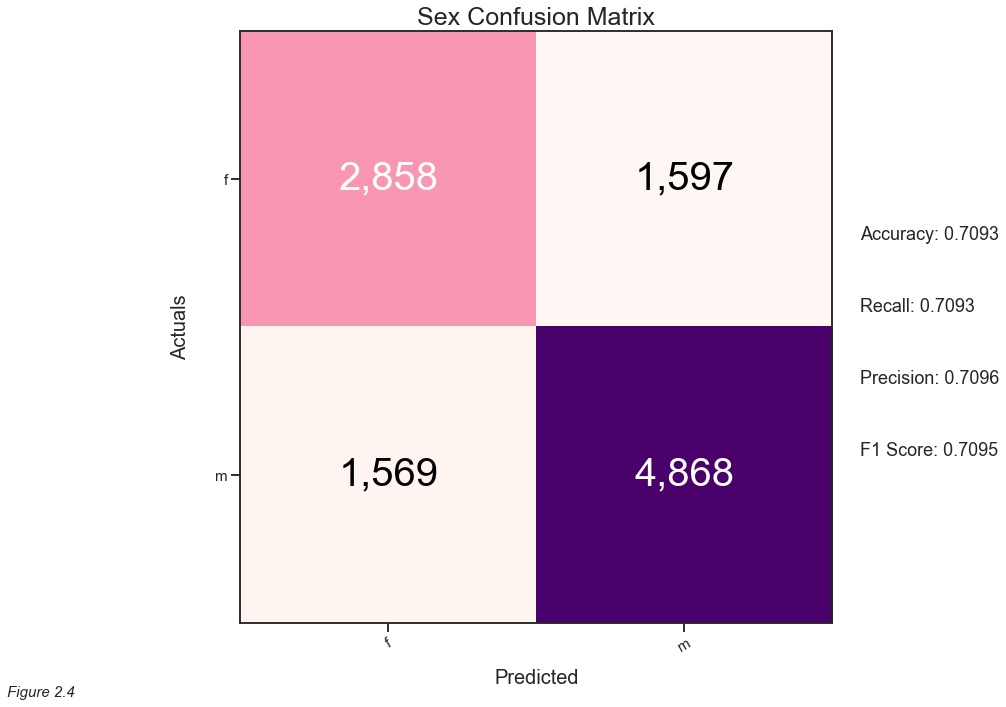

<Figure size 432x288 with 0 Axes>

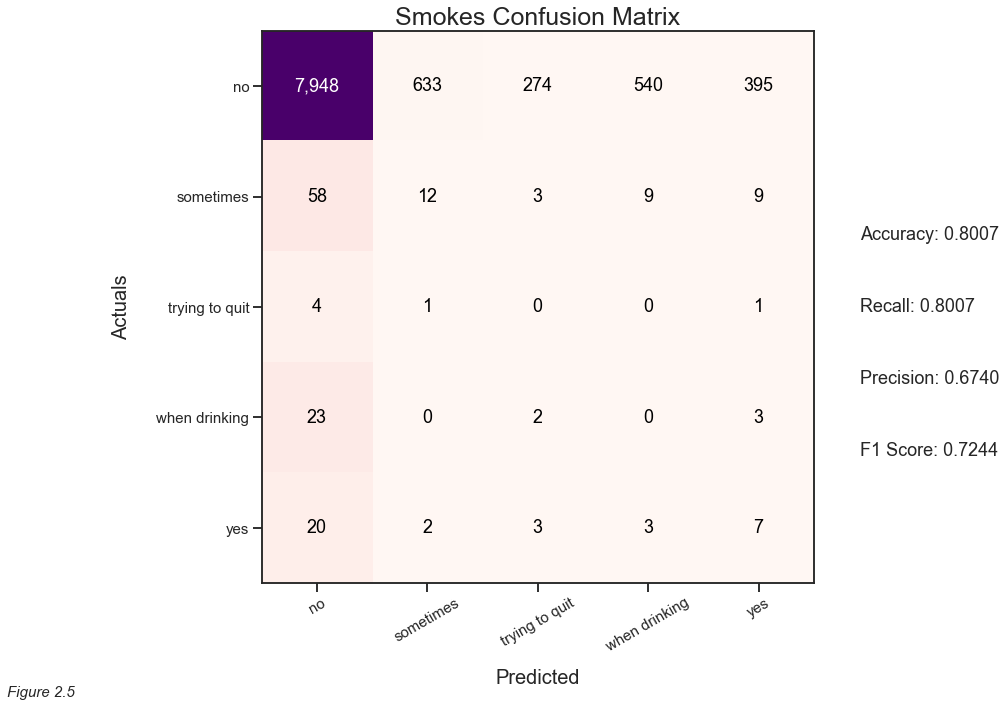

<Figure size 432x288 with 0 Axes>

In [169]:
### The plot above shows that the following five categories hold some level of predictability. It also shows
### that there is relatively little variance between the different essays in which the data is trained on.
predictable_labels = ["drugs", "income", "orientation", "sex", "smokes"]
fignum=0
for pred_l in predictable_labels:
    fignum+=1
    NBC_Score_Plot(pred_l, "essay0", fignum)

## Appendix:

#### Appendix A.1:

The following data visualization portrays two label features, Astrological Sign and Income. If you look at Figure 1.1, you will notice that these two labels fall on the opposite end of the accuracy spectrum. I used the "only_sign" label for this, which has an accuracy of about 10% while the "income" label has about 80% accuracy.

Most of the data that has low predictability has distribution that looks more like then Sign Type chart, while the rest of the data that has high predictability looks more like the Income Range chart (with the exception of the Sex label). This is important to take into account, because we cannot *truly* say that the model is able to accurately predict some of these labels. You could have no data to train the model on, and if it guessed the "-1" option for every guess, it would still accurately predict 80% of the labels (which is technically more accurate than the model itself).

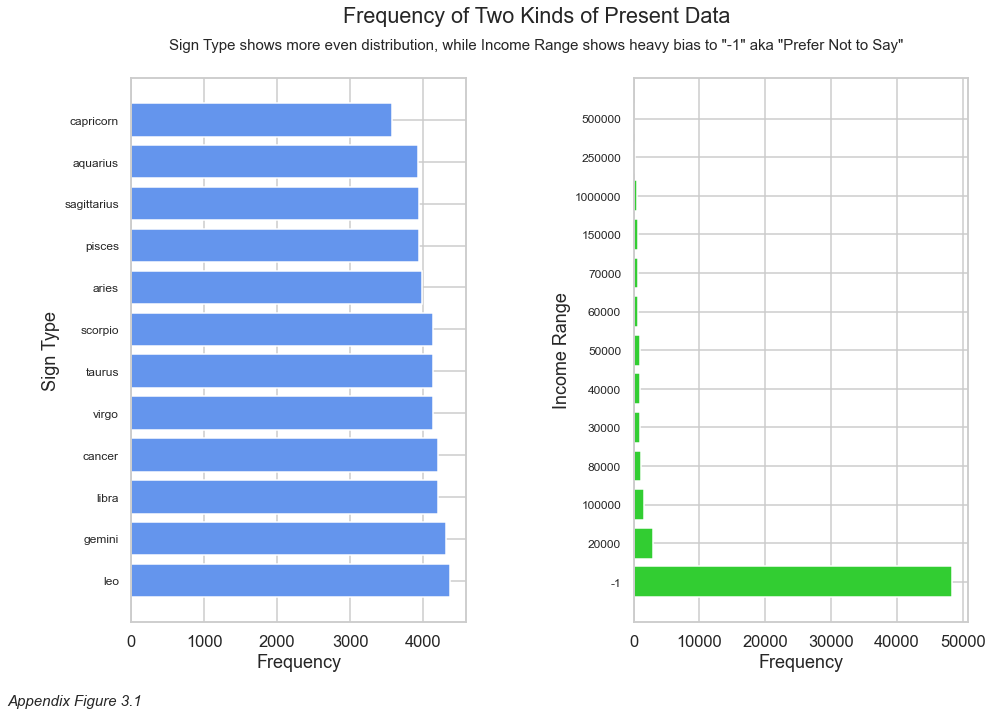

In [170]:
sign_list = df.only_sign.dropna()
sign_list = pd.DataFrame(sign_list.value_counts()).reset_index()

income_list = df.income.dropna().astype(str)
income_list = pd.DataFrame(income_list.value_counts()).reset_index()

sns.set_style("whitegrid")
sns.color_palette("tab10")

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,10))
ax1.barh(sign_list["index"], sign_list.only_sign, color="cornflowerblue")
ax1.set_yticks(range(len(sign_list["index"])))
ax1.set_yticklabels(sign_list["index"], fontsize=12)
ax1.set_ylabel("Sign Type")
ax1.set_xlabel("Frequency")

ax2.barh(income_list["index"], income_list.income, color="limegreen")
ax2.set_yticks(range(len(income_list["index"])))
ax2.set_yticklabels(income_list["index"], fontsize=12)
ax2.set_ylabel("Income Range")
ax2.set_xlabel("Frequency")

fig.suptitle("Frequency of Two Kinds of Present Data")
fig.subplots_adjust(wspace=.5)
fig.text(.5,.92, "Sign Type shows more even distribution, while Income Range shows"\
         " heavy bias to \"-1\" aka \"Prefer Not to Say\"", ha="center", fontsize=15)
fig.text(.01, .01, "Appendix Figure 3.1", fontsize=15, fontstyle="italic")

plt.savefig("AFig3-1_DataFrequency")

plt.show()


## Further Assessment and Evaluation:
Predicting labels utilizing the Naive Bayes Classifier and Essays is not a sustainable and practical model for implementation. Although failing at predicting many labels, it reached a lower bound of what I would consider to be a "good" model in regard to predicting the Sex label (70% accuracy).

A different approach to this project would be to create a Categorical Variabel Decision Tree Classifier model to predict different labels such as Religion, Pets, or Sign (which have a more even distribution). Removing the essay portion from the model altogether would be beneficial too.

## Conclusion
The majority of the labels were unable to be predicted based on the various essays written by users, with the exception of the Sex label.
   - All of the labels that had somewhat even distribution between the label features were unable to be accurately predicted. 
   - All of the labels that could be accurately predicted had a dominantly biased feature, further explaination on this can be found on Appendix A.1.
   - An exception can be made fo the sex label, which had even distribution between label features, and 70% accurate predictions of label features.